In [50]:
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dense, Input, Flatten, Dropout, BatchNormalization
from tensorflow.keras.models import  Sequential, Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical

from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
plt.style.use(['seaborn-white'])

import numpy as np

### 데이터 로드 및 전처리

In [51]:
(x_train_full, y_train_full), (x_test, y_test) = cifar10.load_data()

print(x_train_full.shape)
print(y_train_full.shape)

print(x_test.shape)
print(y_test.shape)

170500096/170498071 [==============================] - 13s 0us/step
(50000, 32, 32, 3)
(50000, 1)
(10000, 32, 32, 3)
(10000, 1)


In [52]:
print(y_test[5])

[6]


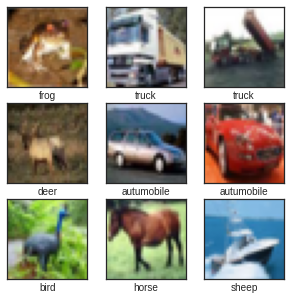

In [53]:
np.random.seed(777)

class_names= ['airplane', 'autumobile', 'bird', 'cat', 'deer',
              'dog', 'frog', 'horse', 'sheep' ,'truck']

sample_size = 9
random_idx = np.random.randint(60000, size = sample_size)


plt.figure(figsize=(5,5))
for i, idx in enumerate(random_idx):
  plt.subplot(3,3, i+1)
  plt.xticks([])
  plt.yticks([])
  plt.imshow(x_train_full[i])
  plt.xlabel(class_names[int(y_train_full[i])])

In [54]:
x_mean = np.mean(x_train_full, axis=(0, 1,2))
x_std=  np.std(x_train_full, axis=(0,1,2))

x_train_full = (x_train_full - x_mean) / x_std
x_test = (x_test - x_mean) / x_std

In [55]:
x_train, x_val, y_train, y_val = train_test_split(x_train_full, y_train_full,
                                                  test_size=.3,
                                                  )

In [56]:
print(x_train.shape)
print(y_train.shape)
print(x_val.shape)
print(y_val.shape)
print(x_test.shape)
print(y_test.shape)

(35000, 32, 32, 3)
(35000, 1)
(15000, 32, 32, 3)
(15000, 1)
(10000, 32, 32, 3)
(10000, 1)


### 모델 구성 및 컴파일


In [57]:
def model_build():
  model = Sequential()

  input = Input(shape=(32, 32, 3))

  output = Conv2D(filters=32, kernel_size=3, padding='same', activation='relu')(input)
  output = MaxPool2D(pool_size=(2,2), strides=2, padding='same')(output)

  output = Conv2D(filters=64, kernel_size=3, padding='same', activation='relu')(output)
  output = MaxPool2D(pool_size=(2,2), strides=2, padding='same')(output)

  output = Conv2D(filters=128, kernel_size=3, padding='same', activation='relu')(output)
  output = MaxPool2D(pool_size=(2,2), strides=2, padding='same')(output)

  output = Flatten()(output)
  output = Dense(256, activation='relu')(output)
  output = Dense(128, activation='relu')(output)
  output = Dense(10, activation='softmax')(output)

  model = Model(inputs=[input], outputs=output)

  model.compile(optimizer= Adam(learning_rate=1e-4),
                loss = 'sparse_categorical_crossentropy',
                metrics=['accuracy'])
  
  return model

In [58]:
model = model_build()

model.summary()

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 32, 32, 3)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 8, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 8, 8, 128)         73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 4, 4, 128)        

### 모델 학습 및 평가
- [런타임]에서 GPU 설정


In [59]:
hist = model.fit(x_train, y_train,
                epochs= 30,
                batch_size = 256,
                validation_data=(x_val, y_val))

Epoch 1/30
137/137 [==============================] - 3s 19ms/step - loss: 1.8939 - accuracy: 0.3267 - val_loss: 1.6527 - val_accuracy: 0.4029
Epoch 2/30
137/137 [==============================] - 2s 15ms/step - loss: 1.5548 - accuracy: 0.4441 - val_loss: 1.5148 - val_accuracy: 0.4553
Epoch 3/30
137/137 [==============================] - 2s 15ms/step - loss: 1.4423 - accuracy: 0.4884 - val_loss: 1.3956 - val_accuracy: 0.5037
Epoch 4/30
137/137 [==============================] - 2s 15ms/step - loss: 1.3538 - accuracy: 0.5219 - val_loss: 1.3374 - val_accuracy: 0.5241
Epoch 5/30
137/137 [==============================] - 2s 15ms/step - loss: 1.2857 - accuracy: 0.5466 - val_loss: 1.2609 - val_accuracy: 0.5554
Epoch 6/30
137/137 [==============================] - 2s 15ms/step - loss: 1.2226 - accuracy: 0.5719 - val_loss: 1.2200 - val_accuracy: 0.5691
Epoch 7/30
137/137 [==============================] - 2s 15ms/step - loss: 1.1696 - accuracy: 0.5909 - val_loss: 1.2010 - val_accuracy: 0.5731

### 텐서보드를 위한 log폴더 지정


In [60]:
import datetime

In [61]:
log_dir = "logs/my_board/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")

tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)

###학습

###시각화

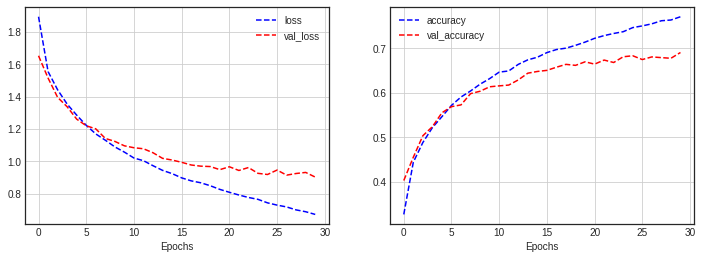

In [62]:
plt.figure(figsize=(12,4))

plt.subplot(1,2,1)
plt.plot(hist.history['loss'], 'b--', label='loss')
plt.plot(hist.history['val_loss'], 'r--', label='val_loss')
plt.xlabel('Epochs')
plt.grid()
plt.legend()

plt.subplot(1,2,2)
plt.plot(hist.history['accuracy'], 'b--', label='accuracy')
plt.plot(hist.history['val_accuracy'], 'r--', label='val_accuracy')
plt.xlabel('Epochs')
plt.grid()
plt.legend()

plt.show()